In [36]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [37]:
#set file paths and read in files
filepath = 'raw_data/MN_walkability.csv'
statepath = 'raw_data/state_and_county_fips_master.csv'

minnesota = pd.read_csv(filepath)
states = pd.read_csv(statepath)

In [38]:
#add leading 0's for counties
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].astype(str)
minnesota['STATEFP'] = minnesota['STATEFP'].astype(str)
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].str.zfill(3)

#concatenate state and county codes
minnesota['fips'] = minnesota['STATEFP'] + minnesota['COUNTYFP']
minnesota['fips'] = minnesota['fips'].astype('int64')
minnesota.head(3)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,fips
0,125050,125051,2.716310e+11,2.716310e+11,27,163,71003,1,378.0,"Minneapolis-St. Paul, MN-WI",33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",3542616,1921136,1875754,1056.247482,7.962303,1048.285179,1016.606830,1934,858.0,817.0,0.616,58,0.070991,320,0.391677,439,0.537332,1090,249,361,480,0.228440,912,131,67,483,200,31,131,67,483,112,31,0,88,0,167,362,383,0.183114,0.843984,1.902407,0.897102,0.128860,0.065906,0.475110,0.196733,0.030494,0.128860,0.065906,0.475110,0.110170,0.030494,0.000000,0.086562,0.000000,1.741086,0,1.116279,0.779689,0.779689,0.784304,0.675799,0.755426,0.761715,0.766262,0.799272,0.640900,0.911089,1.195175,0.822690,12.544361,3.717950,1.952822,6.873589,30.740948,3.052604,4.884167,1.221042,29.305003,6.715730,-99999.0,0.0,0.0,-99999.0,-99999.0,-99999.0,151723,132128,-99999,-99999,0.000366,0.443020,0.000401,0.554131,-99999.0,-99999.0,-99999.0,-99999.0,18,15,8,1,8.500000,12371.721880,4274573.145,27163
1,125051,125052,2.716310e+11,2.716310e+11,27,163,71003,2,378.0,"Minneapolis-St. Paul, MN-WI",33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",3542616,1921136,1875754,709.762874,0.000000,709.762874,696.267080,574,245.0,245.0,0.571,16,0.065306,52,0.212245,177,0.722449,347,79,106,162,0.227666,222,15,36,75,96,0,15,0,75,48,0,48,0,36,46,44,132,0.207207,0.351876,0.824396,0.318843,0.021543,0.051704,0.107717,0.137878,0.000000,0.021543,0.000000,0.107717,0.068939,0.000000,0.068939,0.000000,0.051704,0.670720,0,0.906122,0.870094,0.749458,0.935697,0.724207,0.786196,0.575369,0.584281,0.783623,0.557789,0.780316,1.563063,0.569462,9.682238,2.717426,0.222406,6.742406,24.654544,1.803419,0.901710,0.000000,22.542740,9.017096,-99999.0,0.0,0.0,-99999.0,-99999.0,-99999.0,159687,139365,-99999,-99999,0.000385,0.466275,0.000423,0.584482,-99999.0,-99999.0,-99999.0,-99999.0,18,16,7,1,8.333333,7746.443532,2872369.927,27163
2,125052,125053,2.716310e+11,2.716310e+11,27,163,71003,3,378.0,"Minneapolis-St. Paul, MN-WI",33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",3542616,1921136,1875754,705.410949,146.781354,558.629595,104.219294,998,371.0,371.0,0.634,19,0.051213,101,0.272237,251,0.676550,552,132,164,256,0.239130,735,1,1,497,168,68,1,1,497,154,68,0,14,0,145,98,492,0.197279,3.559802,9.575962,7.052437,0.009595,0.009595,4.768791,1.611986,0.652470,0.009595,0.009595,4.768791,1.477653,0.652470,0.000000,0.134332,0.000000,10.612238,0,1.981132,0.521992,0.521992,0.505467,0.435538,0.667651,0.709028,0.674300,0.574625,0.848240,0.857809,0.751020,0.779596,17.771643,6.711761,1.152157,9.907725,49.273723,8.019625,6.873964,0.000000,24.058876,28.641519,-99999.0,0.0,0.0,-99999.0,-99999.0,-99999.0,136517,118412,-99999,-99999,0.000329,0.398620,0.000360,0.496607,-99999.0,-99999.0,-99999.0,-99999.0,15,6,9,1,6.833333,9884.396703,2854759.734,27163


In [39]:
#merge main dataset with fips codes dataset
merged_df = pd.merge(minnesota,states,on='fips')

#Choose with columns you want to view (feel free to add more!)
#reduced_columns = merged_df

#to remove the column display restriction
pd.options.display.max_columns = None

merged_df.head(3)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,fips,name,state
0,125050,125051,2.716310e+11,2.716310e+11,27,163,71003,1,378.0,"Minneapolis-St. Paul, MN-WI",33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",3542616,1921136,1875754,1056.247482,7.962303,1048.285179,1016.606830,1934,858.0,817.0,0.616,58,0.070991,320,0.391677,439,0.537332,1090,249,361,480,0.228440,912,131,67,483,200,31,131,67,483,112,31,0,88,0,167,362,383,0.183114,0.843984,1.902407,0.897102,0.128860,0.065906,0.475110,0.196733,0.030494,0.128860,0.065906,0.475110,0.110170,0.030494,0.000000,0.086562,0.000000,1.741086,0,1.116279,0.779689,0.779689,0.784304,0.675799,0.755426,0.761715,0.766262,0.799272,0.640900,0.911089,1.195175,0.822690,12.544361,3.717950,1.952822,6.873589,30.740948,3.052604,4.884167,1.221042,29.305003,6.715730,-99999.0,0.0,0.0,-99999.0,-99999.0,-99999.0,151723,132128,-99999,-99999,0.000366,0.443020,0.000401,0.554131,-99999.0,-99999.0,-99999.0,-99999.0,18,15,8,1,8.500000,12371.721880,4274573.145,27163,Washington County,MN
1,125051,125052,2.716310e+11,2.716310e+11,27,163,71003,2,378.0,"Minneapolis-St. Paul, MN-WI",33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",3542616,1921136,1875754,709.762874,0.000000,709.762874,696.267080,574,245.0,245.0,0.571,16,0.065306,52,0.212245,177,0.722449,347,79,106,162,0.227666,222,15,36,75,96,0,15,0,75,48,0,48,0,36,46,44,132,0.207207,0.351876,0.824396,0.318843,0.021543,0.051704,0.107717,0.137878,0.000000,0.021543,0.000000,0.107717,0.068939,0.000000,0.068939,0.000000,0.051704,0.670720,0,0.906122,0.870094,0.749458,0.935697,0.724207,0.786196,0.575369,0.584281,0.783623,0.557789,0.780316,1.563063,0.569462,9.682238,2.717426,0.222406,6.742406,24.654544,1.803419,0.901710,0.000000,22.542740,9.017096,-99999.0,0.0,0.0,-99999.0,-99999.0,-99999.0,159687,139365,-99999,-99999,0.000385,0.466275,0.000423,0.584482,-99999.0,-99999.0,-99999.0,-99999.0,18,16,7,1,8.333333,7746.443532,2872369.927,27163,Washington County,MN
2,125052,125053,2.716310e+11,2.716310e+11,27,163,71003,3,378.0,"Minneapolis-St. Paul, MN-WI",33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",3542616,1921136,1875754,705.410949,146.781354,558.629595,104.219294,998,371.0,371.0,0.634,19,0.051213,101,0.272237,251,0.676550,552,132,164,256,0.239130,735,1,1,497,168,68,1,1,497,154,68,0,14,0,145,98,492,0.197279,3.559802,9.575962,7.052437,0.009595,0.009595,4.768791,1.611986,0.652470,0.009595,0.009595,4.768791,1.477653,0.652470,0.000000,0.134332,0.000000,10.612238,0,1.981132,0.521992,0.521992,0.505467,0.435538,0.667651,0.709028,0.674300,0.574625,0.848240,0.857809,0.751020,0.779596,17.771643,6.711761,1.152157,9.907725,49.273723,8.019625,6.873964,0.000000,24.058876,28.641519,-99999.0,0.0,0.0,-99999.0,-99999.0,-99999.0,136517,118412,-99999,-99999,0.000329,0.398620,0.000360,0.496607,-99999.0,-99999.0,-99999.0,-99999.0,15,6,9,1,6.833333,9884.396703,2854759.734,27163,Washington County,MN


In [40]:
#Display the required data columns for wage-walability attribute relationship
merged_df[["GEOID10","STATEFP","COUNTYFP","name","E_LowWageWk","E_MedWageWk","E_HiWageWk","E_PctLowWage","NatWalkInd"]].head()

,GEOID10,STATEFP,COUNTYFP,name,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,NatWalkInd
0,2.716310e+11,27,163,Washington County,167,362,383,0.183114,8.500000
1,2.716310e+11,27,163,Washington County,46,44,132,0.207207,8.333333
2,2.716310e+11,27,163,Washington County,145,98,492,0.197279,6.833333
3,2.716310e+11,27,163,Washington County,1187,1220,1663,0.291646,13.666667
4,2.716310e+11,27,163,Washington County,1250,999,1124,0.370590,12.666667


In [41]:
#Creating Dataframe with the required cloumn values 

walk_wage_df = pd.DataFrame({
                            "Census_Blockgroup": merged_df["GEOID10"],
                            "State_code": merged_df["STATEFP"],
                            "County_code": merged_df["COUNTYFP"],
                            "County_name": merged_df["name"],
                            "Low_Wage_Group": merged_df["E_LowWageWk"],
                            "Medium_Wage_Group": merged_df["E_MedWageWk"],
                            "High_Wage_Group": merged_df["E_HiWageWk"],
                            "Weighted_Low_Wage": merged_df["E_PctLowWage"],
                            "MN_Walk_Index": merged_df["NatWalkInd"]
                            })
# decimal place value change
walk_wage_df["MN_Walk_Index"] = walk_wage_df["MN_Walk_Index"].map("{:.2f}".format)
walk_wage_df["Weighted_Low_Wage"] = walk_wage_df["Weighted_Low_Wage"].map("{:.2f}".format)

In [42]:
#Display dataframe
walk_wage_df.head()

,Census_Blockgroup,State_code,County_code,County_name,Low_Wage_Group,Medium_Wage_Group,High_Wage_Group,Weighted_Low_Wage,MN_Walk_Index
0,2.716310e+11,27,163,Washington County,167,362,383,0.18,8.50
1,2.716310e+11,27,163,Washington County,46,44,132,0.21,8.33
2,2.716310e+11,27,163,Washington County,145,98,492,0.20,6.83
3,2.716310e+11,27,163,Washington County,1187,1220,1663,0.29,13.67
4,2.716310e+11,27,163,Washington County,1250,999,1124,0.37,12.67


In [43]:
#changing string to float
walk_wage_df['MN_Walk_Index'] = pd.to_numeric(walk_wage_df['MN_Walk_Index'])
walk_wage_df['Weighted_Low_Wage'] = pd.to_numeric(walk_wage_df['Weighted_Low_Wage'])

In [44]:
# data type information
walk_wage_df.dtypes

Census_Blockgroup    float64
State_code            object
County_code           object
County_name           object
Low_Wage_Group         int64
Medium_Wage_Group      int64
High_Wage_Group        int64
Weighted_Low_Wage    float64
MN_Walk_Index        float64
dtype: object

In [45]:
# No. of total counties
walk_wage_df['County_name'].nunique()

87

In [46]:
#Identifying any incomlete rows
walk_wage_df.count()

#drop rows with any missing values
walk_wage_df = walk_wage_df.dropna(how='any')

#final count
walk_wage_df.count()

Census_Blockgroup    4111
State_code           4111
County_code          4111
County_name          4111
Low_Wage_Group       4111
Medium_Wage_Group    4111
High_Wage_Group      4111
Weighted_Low_Wage    4111
MN_Walk_Index        4111
dtype: int64

** No missing values found in the selected data series.

In [47]:
#add buckets for walkability (as per USEPA categorization)

for index,row in walk_wage_df.iterrows():
    if walk_wage_df.loc[index, "MN_Walk_Index"] <= 5.75:
        walk_wage_df.loc[index,'Walkability_bucket'] = 'Least Walkable'
    elif walk_wage_df.loc[index, "MN_Walk_Index"] <= 10.5:
        walk_wage_df.loc[index,'Walkability_bucket'] ='Below Average Walkability'
    elif walk_wage_df.loc[index, "MN_Walk_Index"] <= 15.25:
        walk_wage_df.loc[index,'Walkability_bucket'] = 'Above Average Walkability'
    elif walk_wage_df.loc[index, "MN_Walk_Index"] > 15.25:
        walk_wage_df.loc[index,'Walkability_bucket'] = 'Most Walkable'
walk_wage_df.head()  

,Census_Blockgroup,State_code,County_code,County_name,Low_Wage_Group,Medium_Wage_Group,High_Wage_Group,Weighted_Low_Wage,MN_Walk_Index,Walkability_bucket
0,2.716310e+11,27,163,Washington County,167,362,383,0.18,8.50,Below Average Walkability
1,2.716310e+11,27,163,Washington County,46,44,132,0.21,8.33,Below Average Walkability
2,2.716310e+11,27,163,Washington County,145,98,492,0.20,6.83,Below Average Walkability
3,2.716310e+11,27,163,Washington County,1187,1220,1663,0.29,13.67,Above Average Walkability
4,2.716310e+11,27,163,Washington County,1250,999,1124,0.37,12.67,Above Average Walkability


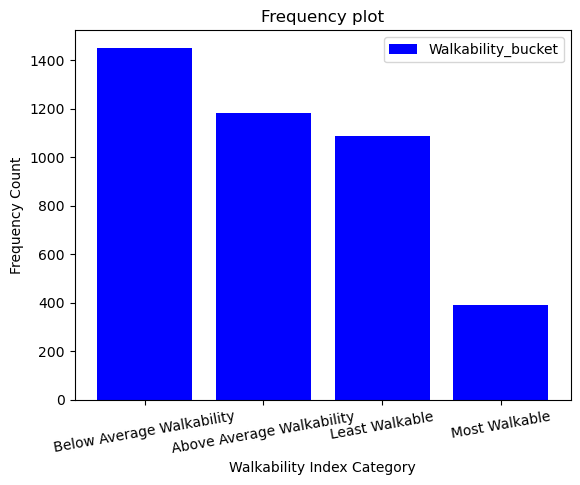

In [51]:
#Frequency of Walkability Count in each walkability Bucket 

x_axis = walk_wage_df["Walkability_bucket"].value_counts().index

y_axis = walk_wage_df["Walkability_bucket"].value_counts()

plt.bar(x_axis, walk_wage_df["Walkability_bucket"].value_counts(), color= 'blue', label ='Walkability_bucket')

plt.title("Walkability Frequency Count")

plt.legend(loc="upper right")

plt.xlabel("Walkability Index Category")

plt.ylabel("Frequency Count")

tick_locations = x_axis

plt.xticks(tick_locations, y_axis.index.values, rotation=10)
plt.title('Frequency plot')
plt.savefig("output_results/frequencyplot.png")
plt.show()

**Observation

 
Observing the Bar Graph of frequency count for the Walkability occurence in each category in Minnesota, maximum frequency was obtained for the 'Below Average walkability' index and least count was reported in 'Most Walkable category'. 

In [14]:
#Statistics of wage workers countywise

agg_summary = walk_wage_df.groupby(["County_name"]).agg({
                                                "MN_Walk_Index": ['mean','median','var','std','sem'],
                                                "Low_Wage_Group": ['mean','median','var','std','sem'],
                                                "Medium_Wage_Group": ['mean','median','var','std','sem'],
                                                "High_Wage_Group": ['mean','median','var','std','sem'],
                                                "Weighted_Low_Wage":['mean','median','var','std','sem']})
agg_summary.head()


MN_Walk_Index                                        \
                         mean median        var       std       sem   
County_name                                                           
Aitkin County        4.901765  4.170   3.818365  1.954064  0.473930   
Anoka County         9.272128  9.000  13.235225  3.638025  0.237319   
Becker County        5.582143  5.250   6.104121  2.470652  0.466909   
Beltrami County      5.843939  5.500   8.464787  2.909431  0.506467   
Benton County        6.195714  5.585  10.079092  3.174759  0.599973   

                Low_Wage_Group                                              \
                          mean median           var         std        sem   
County_name                                                                  
Aitkin County        76.117647   35.0   6316.735294   79.477892  19.276220   
Anoka County        119.604255   54.0  35719.650409  188.996430  12.328768   
Becker County       138.000000   94.0  33295.037037  182.469277  34.483452   
Beltrami County     159.818182   83.0  57331.903409  239.440814  41.681296   
Benton County       153.785714   79.5  41847.211640  204.565910  38.659323   

                Medium_Wage_Group                                              \
                             mean median           var         std        sem   
County_name                                                                     
Aitkin County           84.941176   43.0  11857.183824  108.890697  26.409873   
Anoka County           148.812766   63.0  60047.768212  245.046461  15.985069   
Becker County          184.821429   76.0  82726.448413  287.622058  54.355460   
Beltrami County        214.181818  102.0  92350.590909  303.892400  52.900877   
Benton County          212.000000  120.0  64909.333333  254.773102  48.147591   

                High_Wage_Group                                               \
                           mean median            var         std        sem   
County_name                                                                    
Aitkin County         77.294118   46.0   10385.220588  101.907902  24.716297   
Anoka County         263.689362   63.0  359770.138134  599.808418  39.127187   
Becker County        196.607143   74.5  113546.099206  336.966021  63.680592   
Beltrami County      227.333333  115.0  126425.729167  355.563959  61.895741   
Benton County        268.964286  174.5  146100.924603  382.231507  72.234965   

                Weighted_Low_Wage                                       
                             mean median       var       std       sem  
County_name                                                             
Aitkin County            0.378824  0.360  0.021524  0.146709  0.035582  
Anoka County             0.287574  0.280  0.026233  0.161966  0.010565  
Becker County            0.348929  0.315  0.023462  0.153172  0.028947  
Beltrami County          0.313333  0.290  0.018348  0.135454  0.023580  
Benton County            0.286786  0.250  0.026852  0.163867  0.030968

**Statistical Description of Dataset**
Variance in the dataset is very high which means the data is not normally distributed. There are high chances the data is skewed and thus, can give biased results in the analysis.


In [31]:
#Workers density following each Walkability Index Category

agg_summary1_df2 = pd.DataFrame(walk_wage_df.groupby(["Walkability_bucket"]).agg({
                                                            "Low_Wage_Group": ['sum'],
                                                            "Medium_Wage_Group": ['sum'],
                                                            "High_Wage_Group": ['sum'],
                                                            }))
agg_summary1_df2

,Low_Wage_Group,Medium_Wage_Group,High_Wage_Group
,sum,sum,sum
Walkability_bucket,,,
Above Average Walkability,68730.0,75278.0,87423.0
Below Average Walkability,125117.0,135941.0,152163.0
Least Walkable,47618.0,56330.0,67527.0
Most Walkable,34100.0,37132.0,38896.0


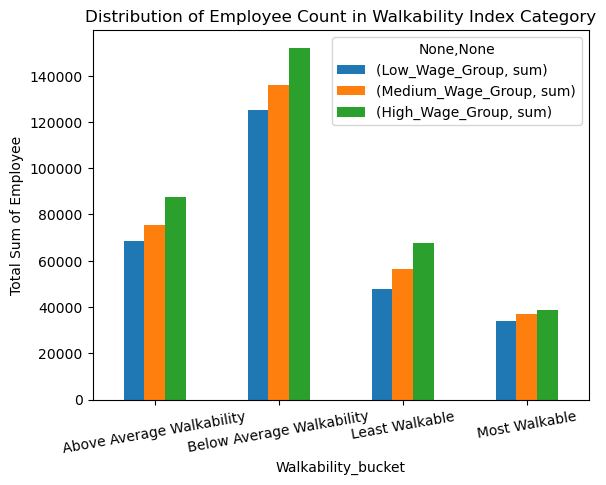

In [32]:
#Bar Plot to visualize the Total Sum of Employees as per Walkability Bucket

ax = agg_summary1_df2.plot.bar(rot=10)
plt.ylabel("Total Sum of Employee")
plt.grid(False)
plt.title('Distribution of Employee Count in Walkability Index Category')
plt.savefig("output_results/Employee_plot.png")

**Distribution of Employee Count in Walkability Index Category**
Employee count was high in the High wage group employee followed by Medium and Low wage employee in Minnesota. Again,  the maximum population was found in the Below and Above average Walkability category. Lowest employee count was found in the least walkable category.

In [33]:
#Data cleaning
#Inspecting Ouliers in the dataset in main dataframe

Q1 = walk_wage_df.quantile(0.25)
Q3 = walk_wage_df.quantile(0.75)
IQR = Q3 - Q1
((walk_wage_df < (Q1 - 1.5 * IQR)) | (walk_wage_df > (Q3 + 1.5 * IQR))).sum()


/var/folders/b8/gjbh6fqx10n_1llx4357k5z40000gn/T/ipykernel_83305/2770092299.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((walk_wage_df < (Q1 - 1.5 * IQR)) | (walk_wage_df > (Q3 + 1.5 * IQR))).sum()


Census_Blockgroup       0
County_code             0
County_name             0
High_Wage_Group       284
Low_Wage_Group        172
MN_Walk_Index           0
Medium_Wage_Group     188
State_code              0
Walkability_bucket      0
Weighted_Low_Wage       6
dtype: int64

    **Outliers: 
            High_Wage_Group       284
            Low_Wage_Group        172
            Medium_Wage_Group     188

In [19]:
#Masking Outliers in dataset for correlation study
mask = (walk_wage_df < (Q1 - 1.5 * IQR)) | (walk_wage_df > (Q3 + 1.5 * IQR))
walk_wage_df[mask] = np.nan


/var/folders/b8/gjbh6fqx10n_1llx4357k5z40000gn/T/ipykernel_83305/1221761183.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = (walk_wage_df < (Q1 - 1.5 * IQR)) | (walk_wage_df > (Q3 + 1.5 * IQR))


In [20]:
#Final dataset used for the statistical analysis
walk_wage_df.dropna(inplace=True)
walk_wage_df.count()

Census_Blockgroup     3424
State_code            3424
County_code           3424
County_name           3424
Low_Wage_Group        3424
Medium_Wage_Group     3424
High_Wage_Group       3424
Weighted_Low_Wage     3424
MN_Walk_Index         3424
Walkability_bucket    3424
dtype: int64

**The dataset used for further analysis is now has 3424 total rows which was 4111 initially. 

In [21]:
walk_wage_df.head(3)

,Census_Blockgroup,State_code,County_code,County_name,Low_Wage_Group,Medium_Wage_Group,High_Wage_Group,Weighted_Low_Wage,MN_Walk_Index,Walkability_bucket
0,2.716310e+11,27,163,Washington County,167.0,362.0,383.0,0.18,8.50,Below Average Walkability
1,2.716310e+11,27,163,Washington County,46.0,44.0,132.0,0.21,8.33,Below Average Walkability
2,2.716310e+11,27,163,Washington County,145.0,98.0,492.0,0.20,6.83,Below Average Walkability


In [22]:
#Correlation matrix with Pearson Correlation
corr = walk_wage_df.corr().round(3)
corr.style.background_gradient(cmap='gray')

#plt.savefig("output_results/corr_matrix.png")

,Census_Blockgroup,Low_Wage_Group,Medium_Wage_Group,High_Wage_Group,Weighted_Low_Wage,MN_Walk_Index
Census_Blockgroup,1.000000,0.041000,0.035000,0.046000,0.012000,-0.089000
Low_Wage_Group,0.041000,1.000000,0.847000,0.640000,0.223000,0.198000
Medium_Wage_Group,0.035000,0.847000,1.000000,0.755000,-0.077000,0.175000
High_Wage_Group,0.046000,0.640000,0.755000,1.000000,-0.309000,0.126000
Weighted_Low_Wage,0.012000,0.223000,-0.077000,-0.309000,1.000000,-0.002000
MN_Walk_Index,-0.089000,0.198000,0.175000,0.126000,-0.002000,1.000000


**Correlation Matrix**
The relation established between the variables was low but was positively associated.

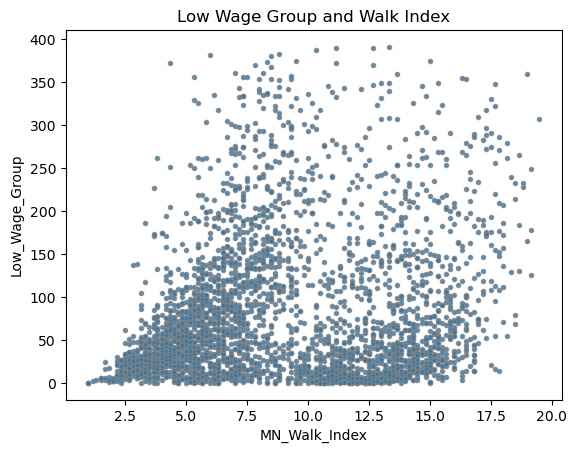

In [23]:
MN_Walk_Index = walk_wage_df["MN_Walk_Index"]

Low_Wage_Group = walk_wage_df["Low_Wage_Group"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(MN_Walk_Index,
            Low_Wage_Group,
            edgecolor="gray", linewidths=1, marker=".",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#plt.title(f"City Latitude vs. Max Temperature)
plt.xlabel("MN_Walk_Index")
plt.ylabel("Low_Wage_Group")
plt.title('Low Wage Group and Walk Index')

#plt.grid(True)

# Save the figure.
plt.savefig("output_results/Walk_lowage.png")

# Show plot.
plt.show()   

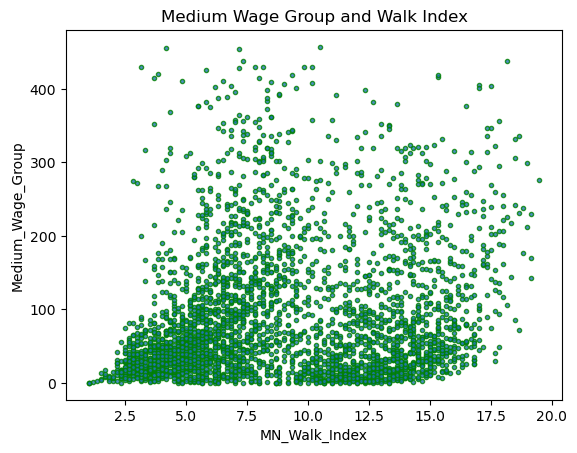

In [24]:
MN_Walk_Index = walk_wage_df["MN_Walk_Index"]
Medium_Wage_Group = walk_wage_df["Medium_Wage_Group"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(MN_Walk_Index,
            Medium_Wage_Group,
            edgecolor="g", linewidths=1, marker=".",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#plt.title(f"City Latitude vs. Max Temperature)
plt.xlabel("MN_Walk_Index")
plt.ylabel("Medium_Wage_Group")
plt.title('Medium Wage Group and Walk Index')
#plt.grid(True)

# Save the figure.
plt.savefig("output_results/Walk_medwage.png")

# Show plot.
plt.show() 

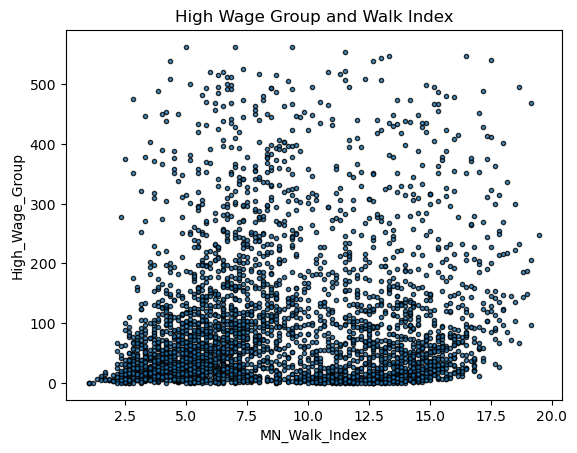

In [25]:
MN_Walk_Index = walk_wage_df["MN_Walk_Index"]
High_Wage_Group = walk_wage_df["High_Wage_Group"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(MN_Walk_Index,
            High_Wage_Group,
            edgecolor="black", linewidths=1, marker=".",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#plt.title(f"City Latitude vs. Max Temperature)
plt.xlabel("MN_Walk_Index")
plt.ylabel("High_Wage_Group")
plt.title('High Wage Group and Walk Index')
#plt.grid(True)

# Save the figure.
plt.savefig("output_results/Walk_highwage.png")

# Show plot.
plt.show() 

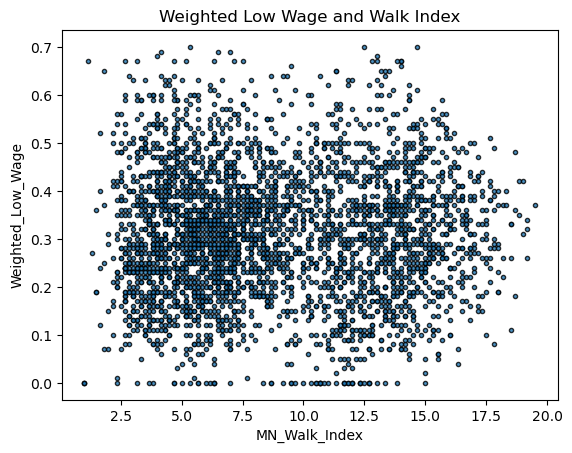

In [26]:

MN_Walk_Index = walk_wage_df["MN_Walk_Index"]
Weighted_Low_Wage = walk_wage_df["Weighted_Low_Wage"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(MN_Walk_Index,
            Weighted_Low_Wage,
            edgecolor="black", linewidths=1, marker=".",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#plt.title(f"City Latitude vs. Max Temperature)
plt.xlabel("MN_Walk_Index")
plt.ylabel("Weighted_Low_Wage")
plt.title('Weighted Low Wage and Walk Index')
#plt.grid(True)

# Save the figure.
plt.savefig("output_results/Walk_workerpercent.png")

# Show plot.
plt.show() 

Regression line equation is: y = 3.83x + 46.57
R squared: 0.03918826903894358


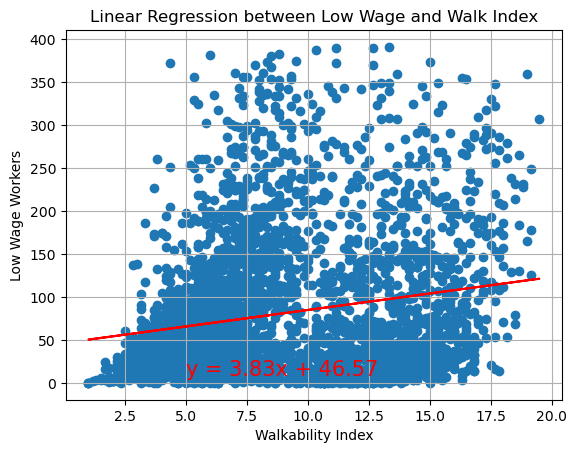

In [27]:
from scipy import stats
from scipy.stats import linregress

y_values = walk_wage_df["Low_Wage_Group"]#.astype("float")
x_values = walk_wage_df["MN_Walk_Index"]#.astype("int")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Walkability Index')
plt.ylabel('Low Wage Workers')
plt.grid(True)
plt.title('Linear Regression between Low Wage and Walk Index')


# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("output_results/lowwage_regress.png")
# Show plot
plt.show()

Regression line equation is: y = 3.7x + 56.25
R squared: 0.03062592600222654


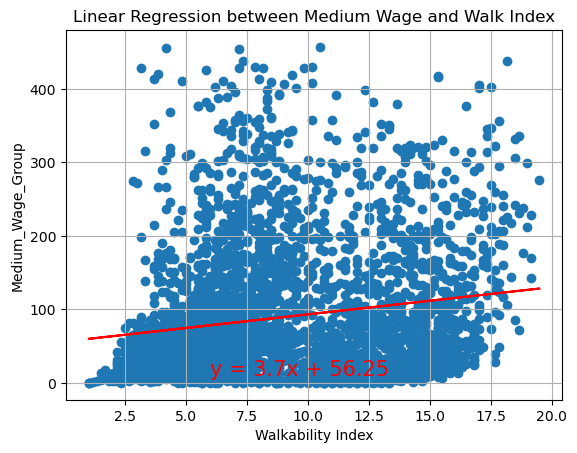

In [28]:
from scipy import stats
from scipy.stats import linregress


y_values = walk_wage_df["Medium_Wage_Group"]#.astype("float")
x_values = walk_wage_df["MN_Walk_Index"]#.astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Walkability Index')
plt.ylabel('Medium_Wage_Group')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.grid(True)
plt.title('Linear Regression between Medium Wage and Walk Index')


# Save the figure
plt.savefig("output_results/med_wage_regress.png")
# Show plot
plt.show()

Regression line equation is: y = 3.47. + 70.35
R squared: 0.01591105469366869


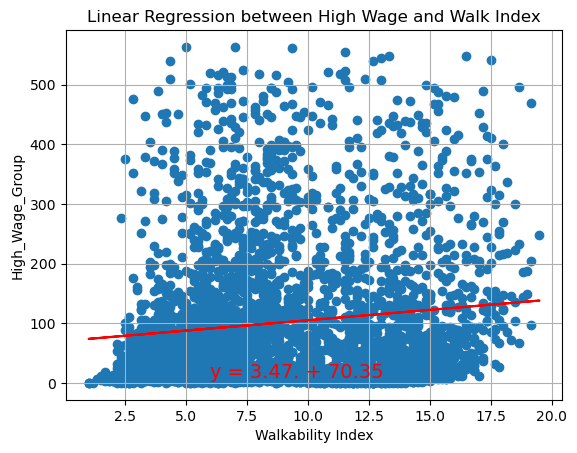

In [29]:
y_values = walk_wage_df["High_Wage_Group"]#.astype("float")
x_values = walk_wage_df["MN_Walk_Index"]#.astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + ". + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,8),fontsize=14,color="red")

# Label plot
plt.xlabel('Walkability Index')
plt.ylabel('High_Wage_Group')
plt.grid(True)
plt.title('Linear Regression between High Wage and Walk Index')


# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("output_results/High_wage_regress.png")
# Show plot
plt.show()

Regression line equation is: y = -0.0x + 0.31
R squared: 2.376394137537465e-06


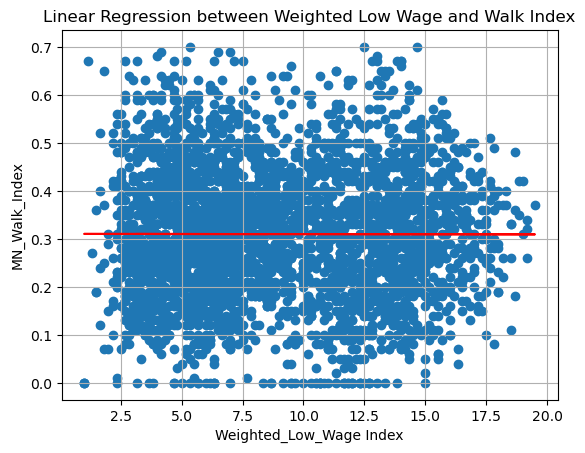

In [30]:

y_values = walk_wage_df["Weighted_Low_Wage"]#.astype("float")
x_values = walk_wage_df["MN_Walk_Index"]#.astype("int")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Weighted_Low_Wage Index')
plt.ylabel('MN_Walk_Index')
plt.grid(True)
plt.title('Linear Regression between Weighted Low Wage and Walk Index')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("output_results/weighted_regress.png")
# Show plot
plt.show()

**Regression analysis with the normalized data was not very good. R sq. value cannot be higher than 1. This may be due to the fact that one variable was normalized and the second variable still has the noise in data.

**Conclusion**
The Statistical analysis in the present dataset does not able to establish a good regression fit or correlation. But the association was consistently positive. Further analysis of this data following data transformation or smoothening might give a different result.